In [116]:
# https://www.kaggle.com/c/titanic
#Построить 5 графиков по выбранным данным.
# Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 
# Для каждого графика описать, какого типа переменные участвуют в визуализации,
# какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) 
# и почему был выбран именно такой тип графика.

In [135]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [136]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df = train.dropna()
df['Sex'].replace(to_replace=dict(female=1, male=0), inplace=True)
df['Embarked'].replace(to_replace=dict(Q=2,C=1, S=0), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0


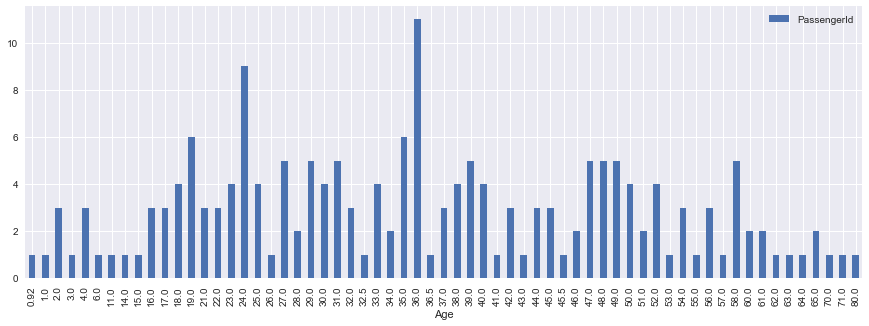

In [161]:
#matplotlib
df[['PassengerId']+['Age']].groupby(['Age']).count().plot(kind='bar');
#Посмотрим распеределение пассажиров по возрасту

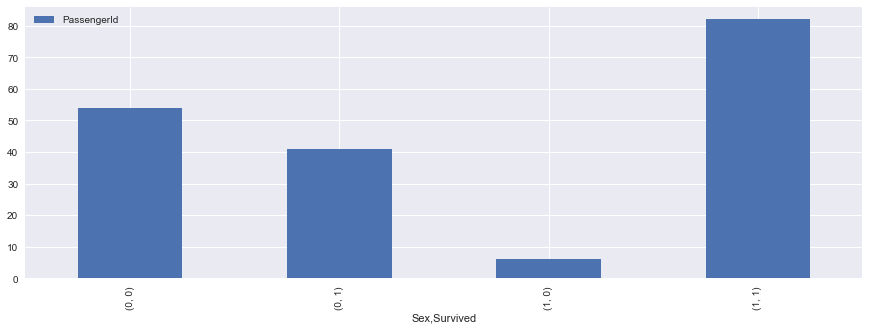

In [162]:
df[['PassengerId']+ ['Survived']+ ['Sex']].groupby(['Sex', 'Survived']).count()\
    .plot(kind='bar',);
#Барчарт для сравнения кол-ва вывших в зависимости от пола

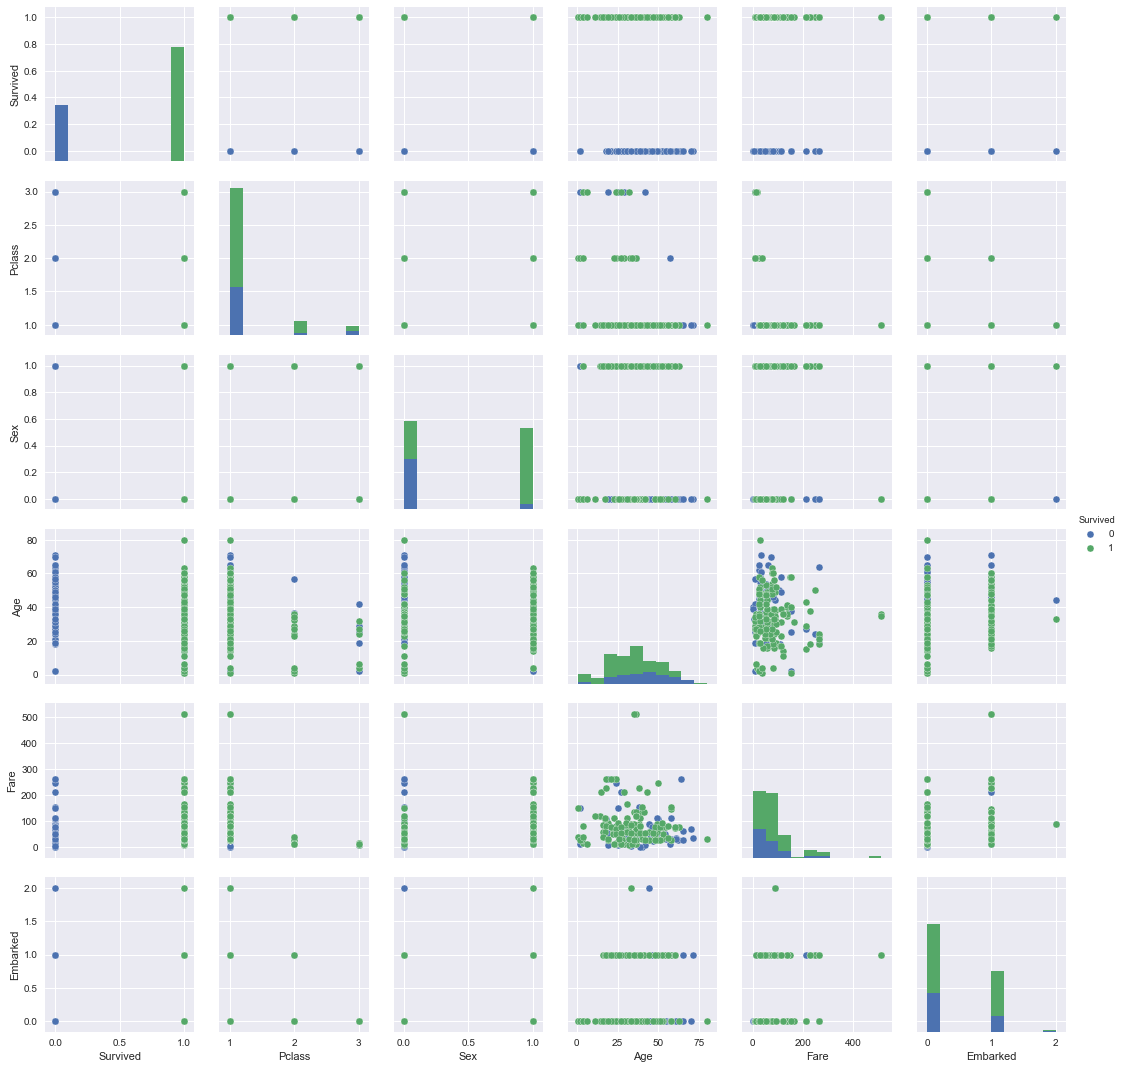

In [173]:
#seaborn
# pairplot - в общем постотреть на признаки и их возможные корреляции
sns_plot = sns.pairplot(
    df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']],
    hue='Survived');

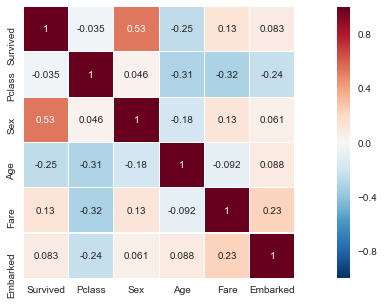

In [179]:
#И Heatmap для этиж же целей
sns.heatmap(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)



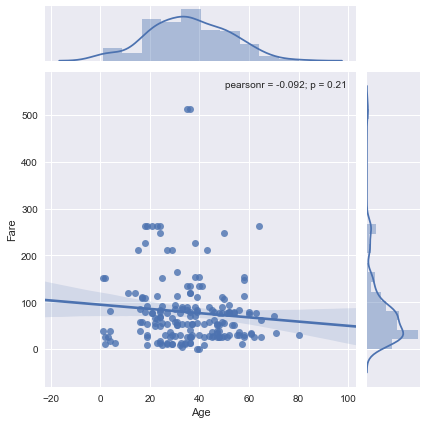

In [186]:
sns.jointplot(x='Age', y='Fare', 
              data=df, kind='reg');
#коррелиция пассажиров по возрасту и цене за билет(строим потому-что вещественные признаки хоть они и не коррелируют)

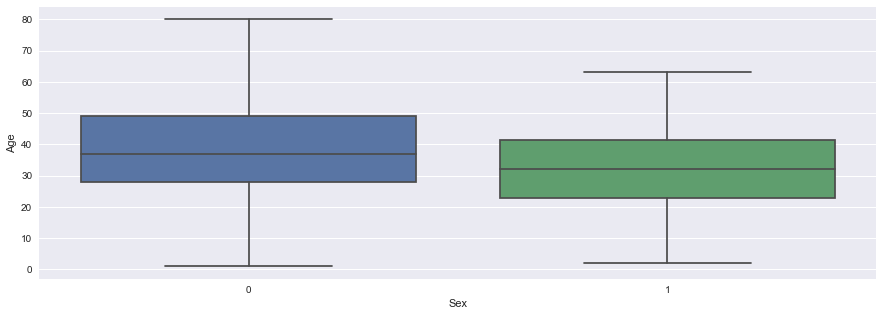

In [189]:
sns.boxplot(x="Sex", y="Age", data=df)
#распределиние полов по возрастам 

In [165]:
#plotly

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [168]:
surv = df[(df['Survived'] == 1) & (df['Sex'] == 1)].groupby('Age')[['Survived']].count()
surv_1 = df[(df['Survived'] == 1) & (df['Sex'] == 0)].groupby('Age')[['Survived']].count()
surv_2 = df[(df['Survived'] == 0) & (df['Sex'] == 1)].groupby('Age')[['Survived']].count()
surv_3 = df[(df['Survived'] == 0) & (df['Sex'] == 0)].groupby('Age')[['Survived']].count()
#Постороим интерактивную визуализауию кол-ва выживших в зависимости от пола и возраста

In [169]:
trace0 = go.Scatter(
    x=surv.index,
    y=surv['Survived'],
    name ='Female Survived',
    mode = 'markers',
    marker = dict(
        size = 10*surv['Survived'],
        color = 'aqua'
    )
)

trace1 = go.Scatter(
    x=surv_1.index,
    y=surv_1['Survived'],
    name='Female not Survived',
    mode = 'markers',
    marker = dict(
        size = 10*surv_1['Survived'],
        color = 'pink'
    )
)

trace2 = go.Scatter(
    x=surv_2.index,
    y=surv_2['Survived'],
    name='Male Survived',
    mode = 'markers',
    marker = dict(
        size = 10*surv_2['Survived'],
        color = 'green'
    )
)

trace3 = go.Scatter(
    x=surv_3.index,
    y=surv_3['Survived'],
    name='Male not Survived',
    mode = 'markers+dots',
    marker = dict(
        size = 10*surv_3['Survived'],
        color = 'red'
    )
)


data = [trace0, trace1, trace2, trace3]
layout = {'title': 'Statistics of Survived'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)